## HKUST Bioenginerring BIEN 3320 Data Science for Biology and Medicine
## Correlation between Risk Factors and Coronary Heart Diesase(CHD)

#### Import Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# you can choose local path too if you want
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Loading data from dataset

In [4]:
# getting data from google drive
# path = '/content/drive/MyDrive/Colab Notebooks/heart_disease_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path)

In [6]:
# display first five items of the dataset
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Data preprocessing

In [ ]:
# modify the value of mental health and physical health to be negative
# for correlation calculation later
data['MentHlth'] = -data['MentHlth']

In [ ]:
data['PhysHlth'] = -data['PhysHlth']

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,-18.0,-15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.0,-0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,-30.0,-30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,-0.0,-0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,-3.0,-0.0,0.0,0.0,11.0,5.0,4.0


#### Data Cleaning

Since some of the feature may not be a important factor for our evaluation, we have drop those columns.

In [ ]:
data = data.drop(['CholCheck', 'NoDocbcCost'], axis=1)

In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,-18.0,-15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,-0.0,-0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,-30.0,-30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,-0.0,-0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,-3.0,-0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print("The shape of the dataset is : ", data.shape)

The shape of the dataset is :  (253680, 20)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   Diabetes              253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [ ]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
HeartDiseaseorAttack,2
HighBP,2
HighChol,2
BMI,84
Smoker,2
Stroke,2
Diabetes,3
PhysActivity,2
Fruits,2
Veggies,2


In [ ]:
catcol = ['HeartDiseaseorAttack', 'HighBP', 'HighChol','Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare','GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

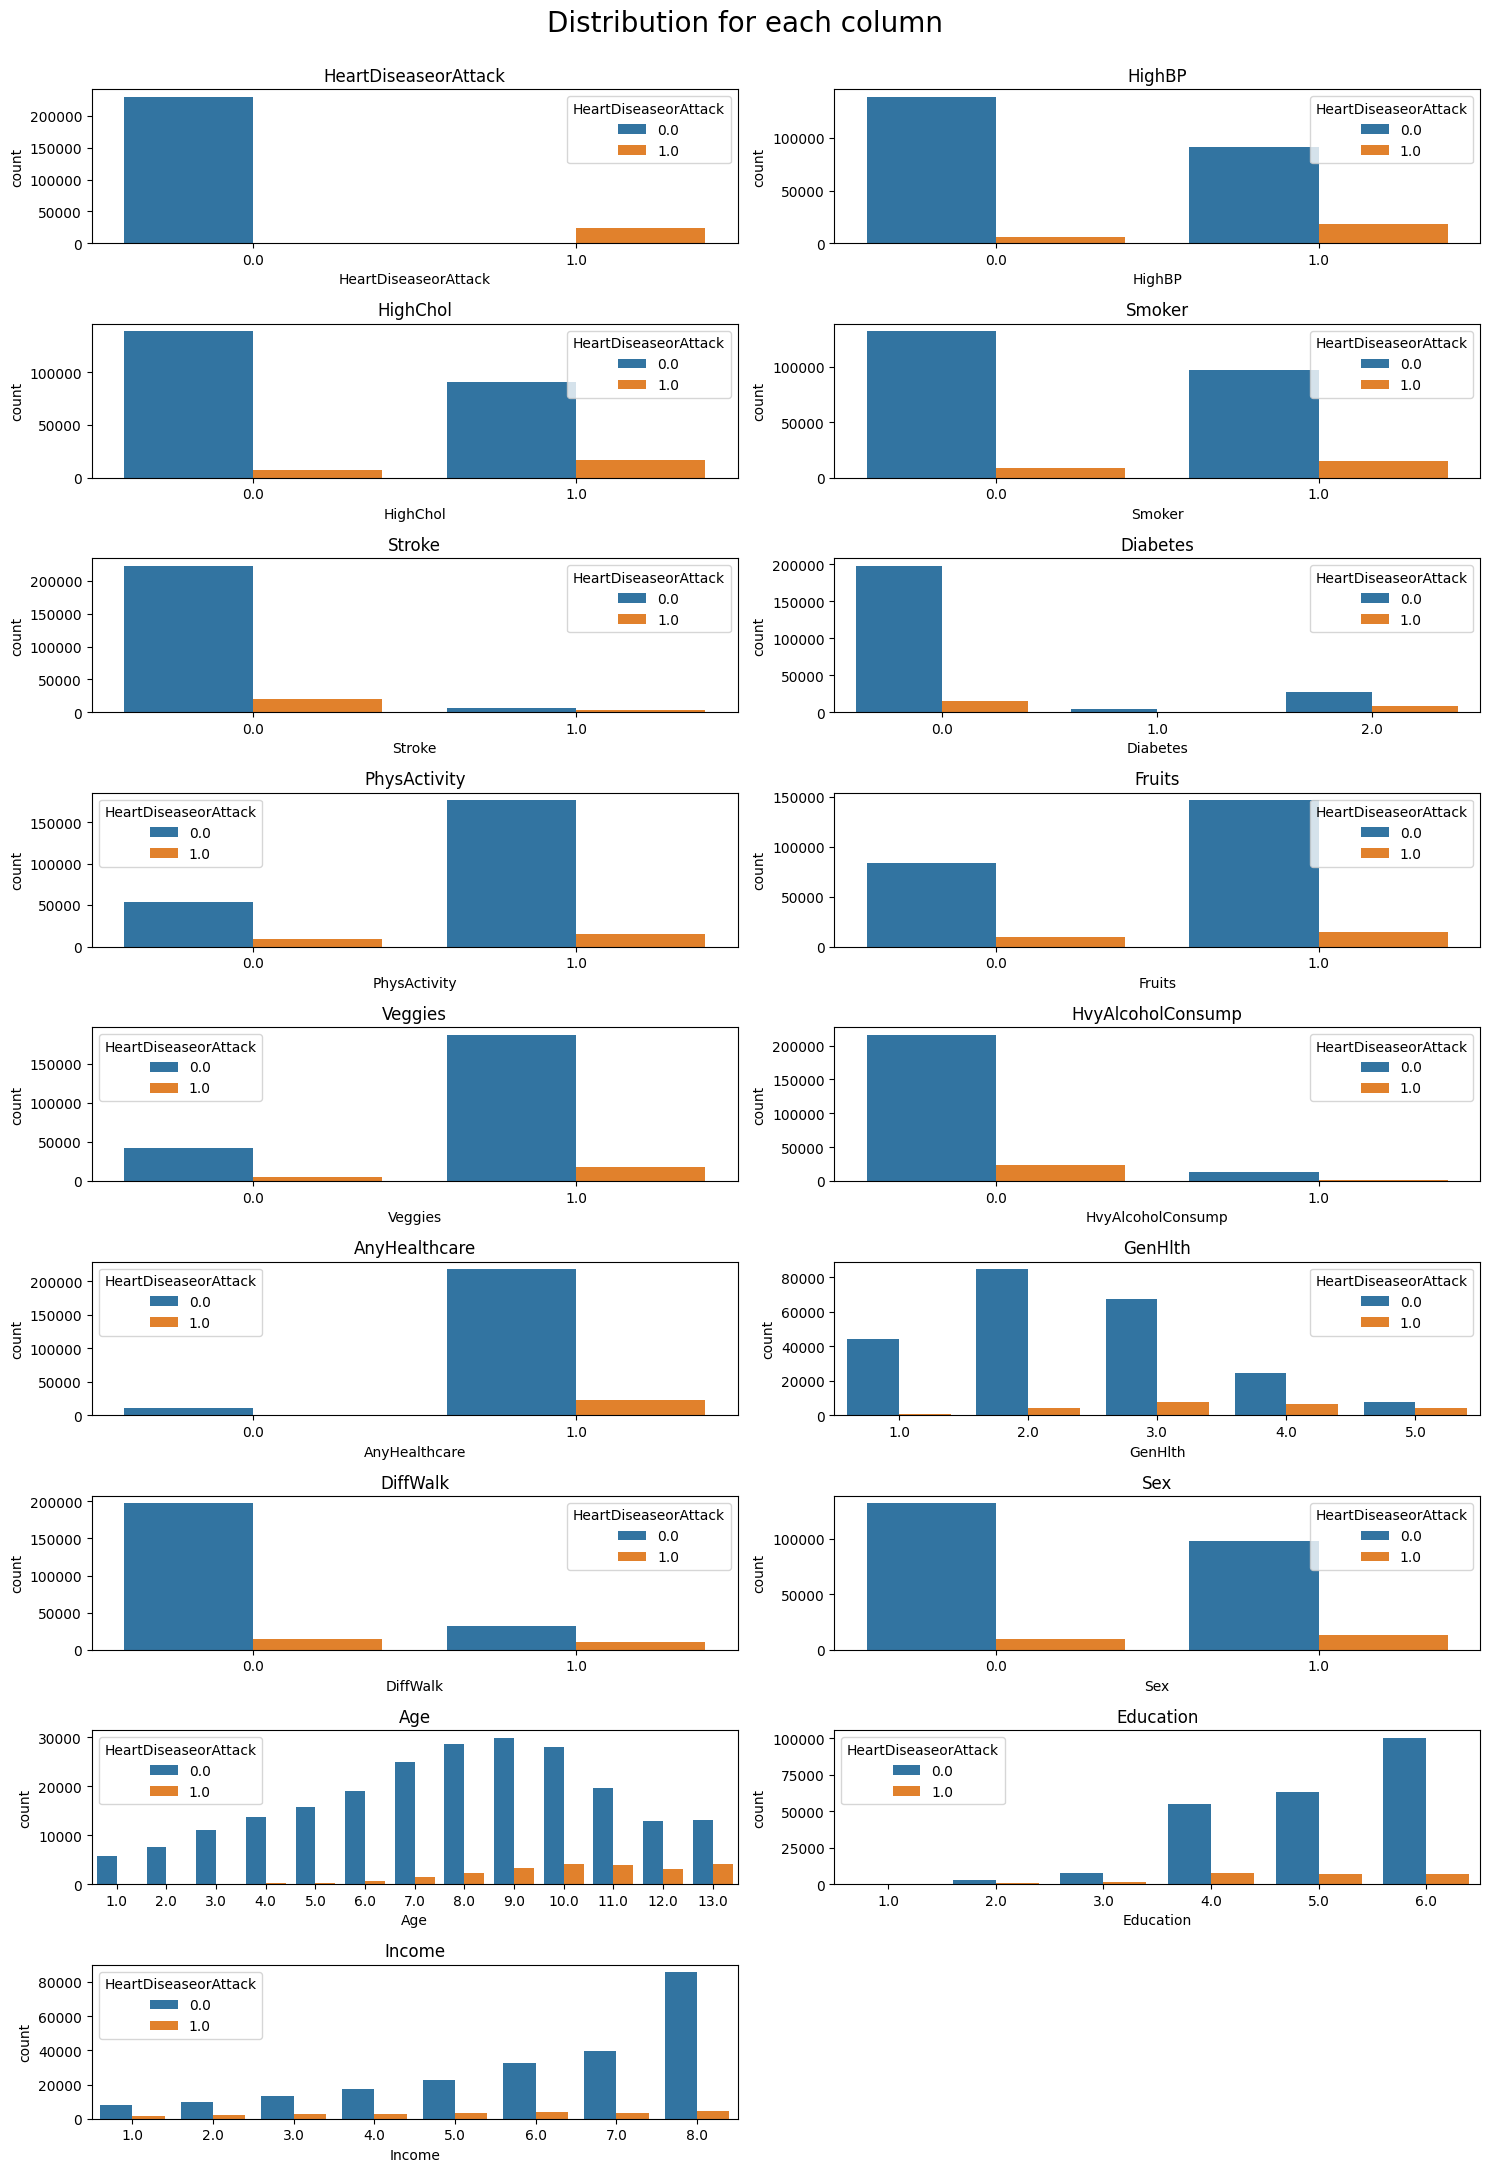

In [ ]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Distribution for each column", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
tmp = pd.read_csv(path)

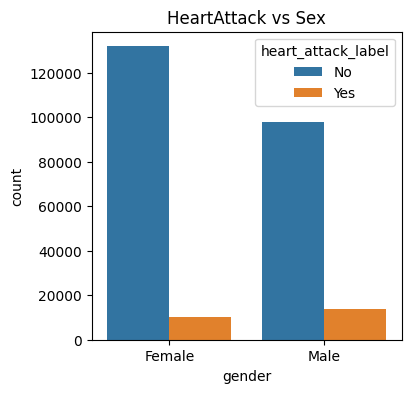

In [ ]:
tmp['heart_attack_label'] = data['HeartDiseaseorAttack'].map({0.0: 'No', 1.0: 'Yes'})
tmp['gender'] = data['Sex'].map({0.0: 'Female', 1.0: 'Male'})
tmp['heart_attack_label']


plt.figure(figsize=(4,4))
g = sns.countplot(
    x=tmp['gender'], 
    hue=tmp['heart_attack_label'],
    data=tmp,
)

plt.title("HeartAttack vs Sex")
plt.show(g)

In [ ]:
data['Age'].describe()

count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64

In [ ]:
data.groupby('Age')['HeartDiseaseorAttack'].mean()

Age
1.0     0.005088
2.0     0.007107
3.0     0.011328
4.0     0.013962
5.0     0.021724
6.0     0.035925
7.0     0.054154
8.0     0.073073
9.0     0.101011
10.0    0.130242
11.0    0.167722
12.0    0.193554
13.0    0.239532
Name: HeartDiseaseorAttack, dtype: float64

#### Data visualization

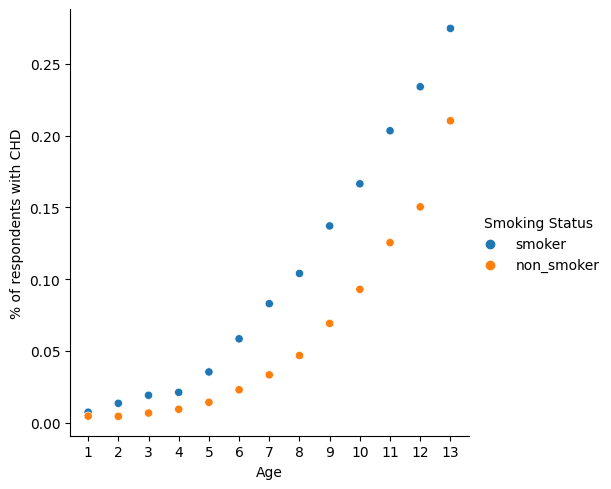

In [ ]:
smoker = data.loc[data['Smoker'] == 1]
non_smoker = data.loc[data['Smoker'] == 0]

df = pd.DataFrame({'Age': smoker.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'smoker':smoker.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'non_smoker':non_smoker.groupby('Age')['HeartDiseaseorAttack'].mean().values})


# smoker.groupby('Age')['HeartDiseaseorAttack'].mean()
# non_smoker.groupby('Age')['HeartDiseaseorAttack'].mean()

melted_df = df.melt(id_vars=['Age'], var_name = 'Smoking Status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Smoking Status', data=melted_df)
g.set(xticks=df.Age.values)


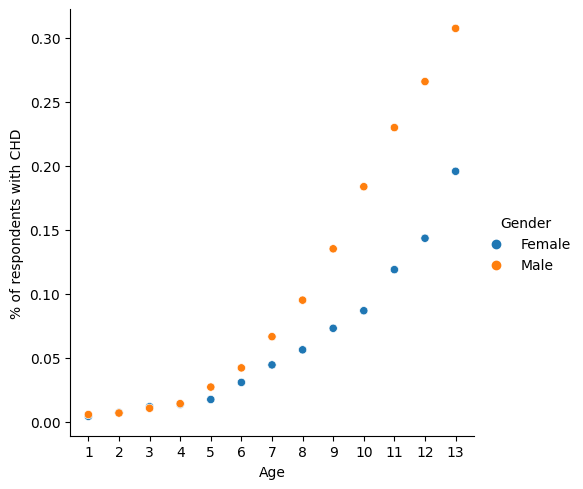

In [ ]:
female = data.loc[data['Sex'] == 0]
male = data.loc[data['Sex'] == 1]

df = pd.DataFrame({'Age': smoker.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Female':female.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Male':male.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Gender', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Gender', data=melted_df)
g.set(xticks=df.Age.values)

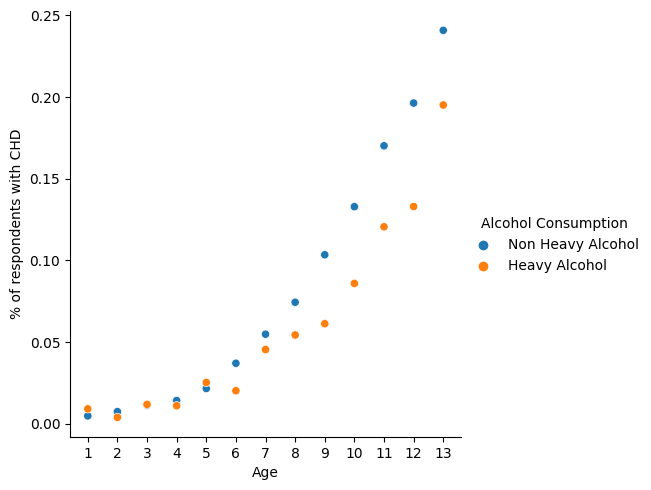

In [ ]:
no_HvyAlcohol = data.loc[data['HvyAlcoholConsump'] == 0]
HvyAlcohol = data.loc[data['HvyAlcoholConsump'] == 1]

df = pd.DataFrame({'Age': smoker.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Non Heavy Alcohol':no_HvyAlcohol.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Heavy Alcohol':HvyAlcohol.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Alcohol Consumption', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Alcohol Consumption', data=melted_df)
g.set(xticks=df.Age.values)

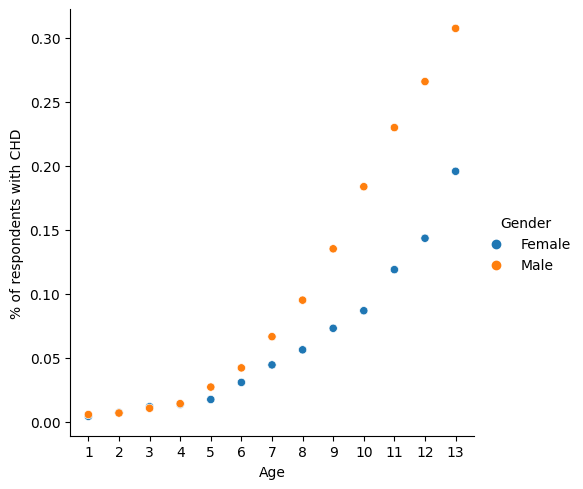

In [ ]:
female = data.loc[data['Sex'] == 0]
male = data.loc[data['Sex'] == 1]

df = pd.DataFrame({'Age': smoker.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Female':female.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Male':male.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Gender', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Gender', data=melted_df)
g.set(xticks=df.Age.values)

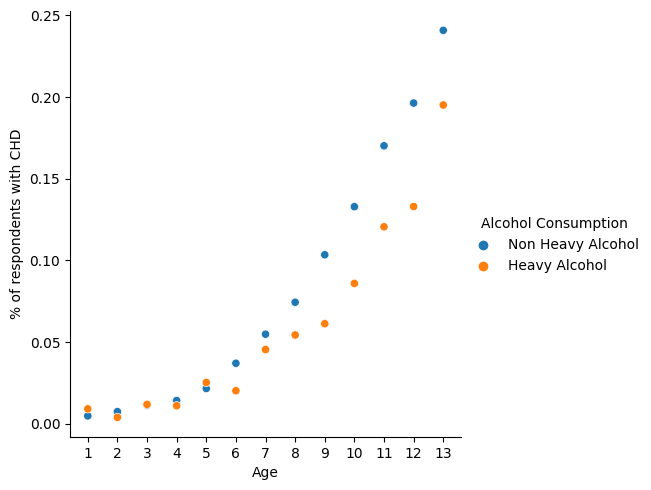

In [ ]:
no_HvyAlcohol = data.loc[data['HvyAlcoholConsump'] == 0]
HvyAlcohol = data.loc[data['HvyAlcoholConsump'] == 1]

df = pd.DataFrame({'Age': smoker.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Non Heavy Alcohol':no_HvyAlcohol.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Heavy Alcohol':HvyAlcohol.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Alcohol Consumption', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Alcohol Consumption', data=melted_df)
g.set(xticks=df.Age.values)

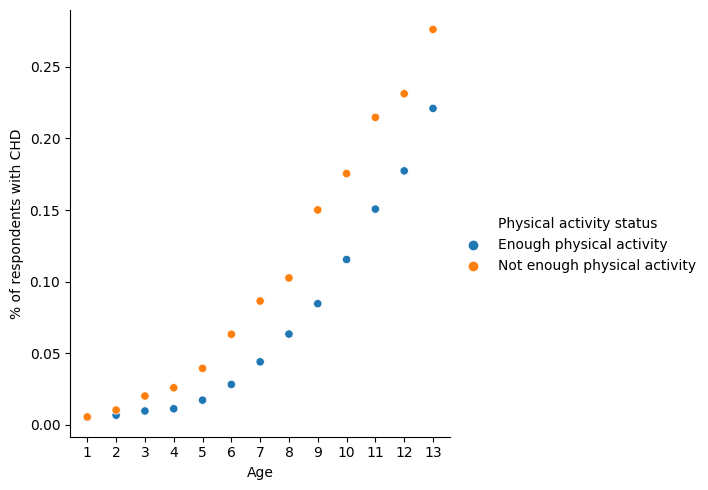

In [ ]:
physical_activity = data.loc[data['PhysActivity'] == 1]
no_physical_activity = data.loc[data['PhysActivity'] == 0]


df = pd.DataFrame({'Age': physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Enough physical activity':physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Not enough physical activity':no_physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values})



melted_df = df.melt(id_vars=['Age'], var_name = 'Physical activity status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Physical activity status', data=melted_df)
g.set(xticks=df.Age.values)

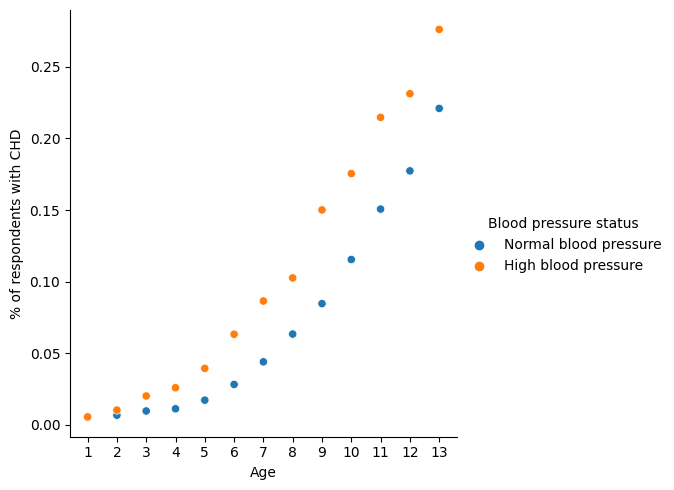

In [ ]:
High_BP = data.loc[data['HighBP'] == 1]
Not_High_BP = data.loc[data['HighBP'] == 0]

df = pd.DataFrame({'Age': physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Normal blood pressure':physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'High blood pressure':no_physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Blood pressure status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Blood pressure status', data=melted_df)
g.set(xticks=df.Age.values)

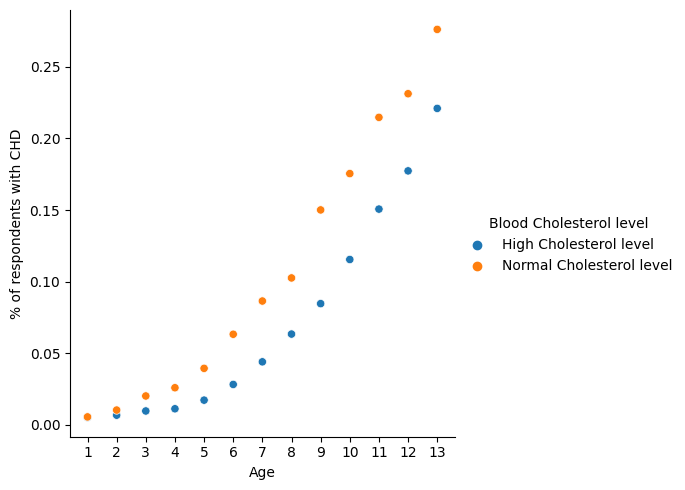

In [ ]:
High_Chol = data.loc[data['HighChol'] == 1]
No_High_Chol = data.loc[data['HighChol'] == 0]

df = pd.DataFrame({'Age': physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'High Cholesterol level':physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Normal Cholesterol level':no_physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Blood Cholesterol level', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Blood Cholesterol level', data=melted_df)
g.set(xticks=df.Age.values)

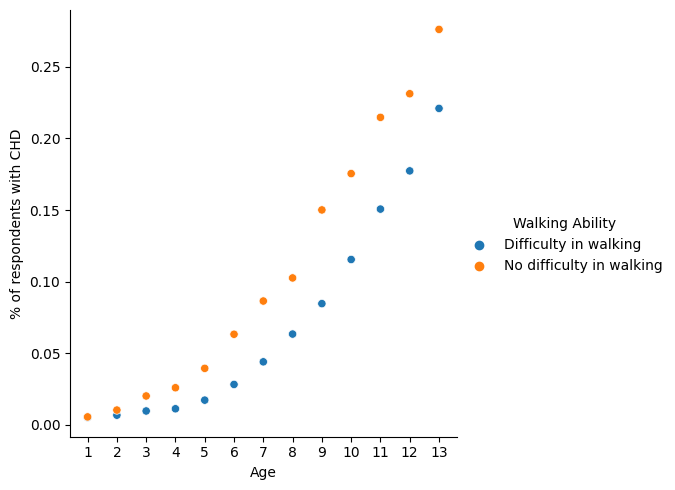

In [ ]:
DiffWalk = data.loc[data['DiffWalk'] == 1]
No_DiffWalk = data.loc[data['DiffWalk'] == 0]

df = pd.DataFrame({'Age': physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Difficulty in walking':physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'No difficulty in walking':no_physical_activity.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Walking Ability', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Walking Ability', data=melted_df)
g.set(xticks=df.Age.values)

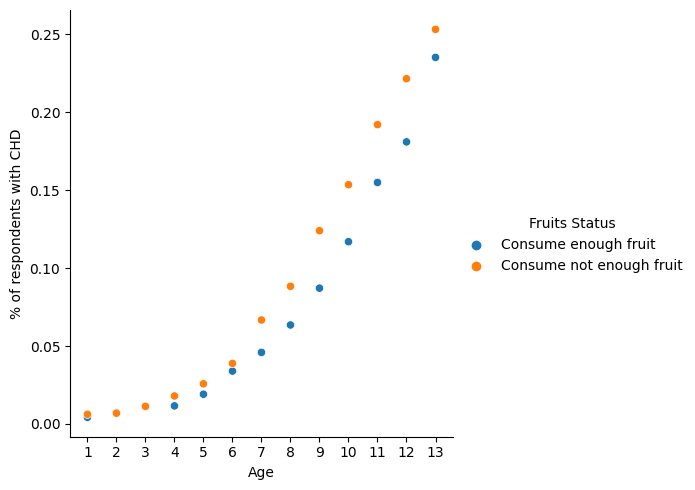

In [ ]:
fruits = data.loc[data['Fruits'] == 1]
no_fruits = data.loc[data['Fruits'] == 0]

fruits.groupby('Age')['HeartDiseaseorAttack'].mean()
no_fruits.groupby('Age')['HeartDiseaseorAttack'].mean()

df = pd.DataFrame({'Age': fruits.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Consume enough fruit':fruits.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Consume not enough fruit':no_fruits.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Fruits Status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Fruits Status', data=melted_df)
g.set(xticks=df.Age.values)

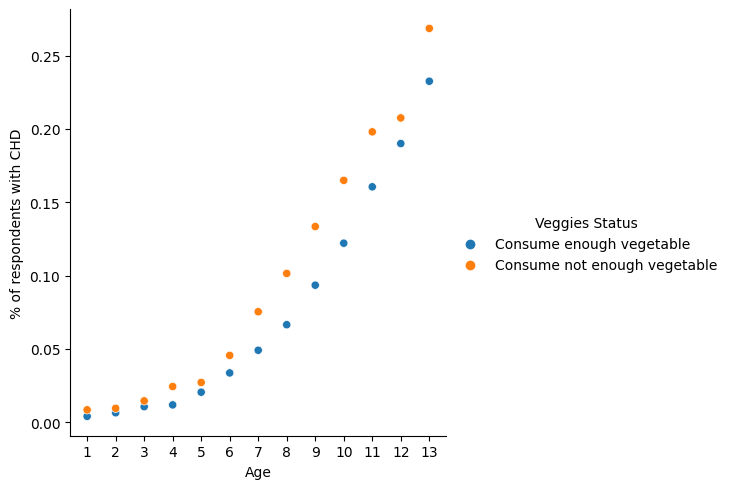

In [ ]:
veggies = data.loc[data['Veggies'] == 1]
no_veggies = data.loc[data['Veggies'] == 0]

veggies.groupby('Age')['HeartDiseaseorAttack'].mean()
no_veggies.groupby('Age')['HeartDiseaseorAttack'].mean()

df = pd.DataFrame({'Age': veggies.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Consume enough vegetable':veggies.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Consume not enough vegetable':no_veggies.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Veggies Status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Veggies Status', data=melted_df)
g.set(xticks=df.Age.values)

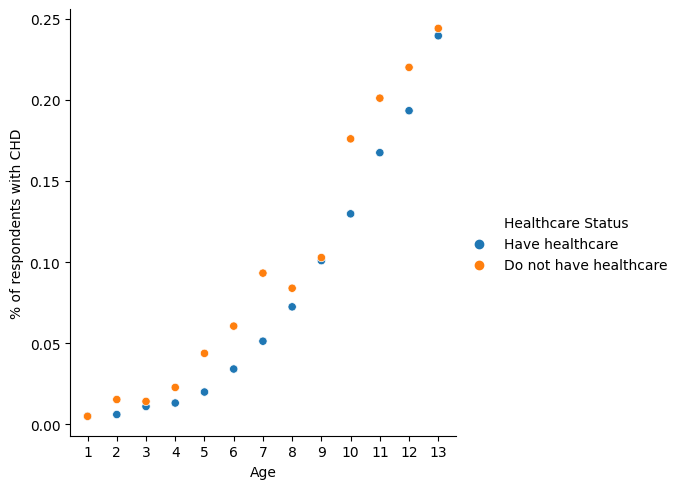

In [ ]:
healthcare = data.loc[data['AnyHealthcare'] == 1]
no_healthcare = data.loc[data['AnyHealthcare'] == 0]

healthcare.groupby('Age')['HeartDiseaseorAttack'].mean()
no_healthcare.groupby('Age')['HeartDiseaseorAttack'].mean()

df = pd.DataFrame({'Age': healthcare.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Have healthcare':healthcare.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Do not have healthcare':no_healthcare.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Healthcare Status', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Healthcare Status', data=melted_df)
g.set(xticks=df.Age.values)

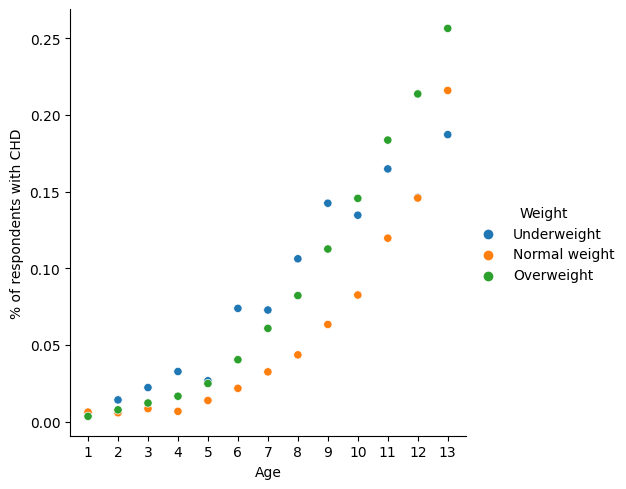

In [ ]:
Underweight = data.loc[data['BMI'] < 19]
Normal = data.loc[(data['BMI'] > 19) & (data['BMI'] <= 24)]
Overweight = data.loc[data['BMI'] > 24]

df = pd.DataFrame({'Age': Underweight.groupby('Age')['HeartDiseaseorAttack'].mean().index,
                   'Underweight':Underweight.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Normal weight':Normal.groupby('Age')['HeartDiseaseorAttack'].mean().values,
                   'Overweight':Overweight.groupby('Age')['HeartDiseaseorAttack'].mean().values})


melted_df = df.melt(id_vars=['Age'], var_name = 'Weight', value_name='% of respondents with CHD')
g = sns.relplot(x='Age', y='% of respondents with CHD', hue = 'Weight', data=melted_df)
g.set(xticks=df.Age.values)

In [ ]:
age = data[['Age','HeartDiseaseorAttack','HighBP','HighChol','BMI','Smoker','PhysActivity','Fruits','Veggies','MentHlth','PhysHlth','DiffWalk']]

In [ ]:
age_new = age.pivot_table(index=['Age','HeartDiseaseorAttack'], aggfunc = np.mean)
age_new.reset_index(level='HeartDiseaseorAttack',inplace=True)
age_new.fillna(age_new.mean(),inplace=True)
age_new.head()

,HeartDiseaseorAttack,BMI,DiffWalk,Fruits,HighBP,HighChol,MentHlth,PhysActivity,PhysHlth,Smoker,Veggies
Age,,,,,,,,,,,
1.0,0.0,26.089226,0.020808,0.576618,0.085523,0.087815,-4.357433,0.868630,-1.971963,0.217951,0.773938
1.0,1.0,25.862069,0.137931,0.482759,0.241379,0.137931,-7.827586,0.862069,-4.482759,0.310345,0.620690
2.0,0.0,27.591463,0.031416,0.599947,0.113600,0.124867,-3.766172,0.844512,-2.094910,0.302094,0.807397
2.0,1.0,29.685185,0.240741,0.611111,0.444444,0.203704,-8.648148,0.777778,-6.574074,0.574074,0.740741
3.0,0.0,28.427116,0.039465,0.625625,0.143494,0.162408,-3.756388,0.826043,-2.398018,0.375011,0.834500


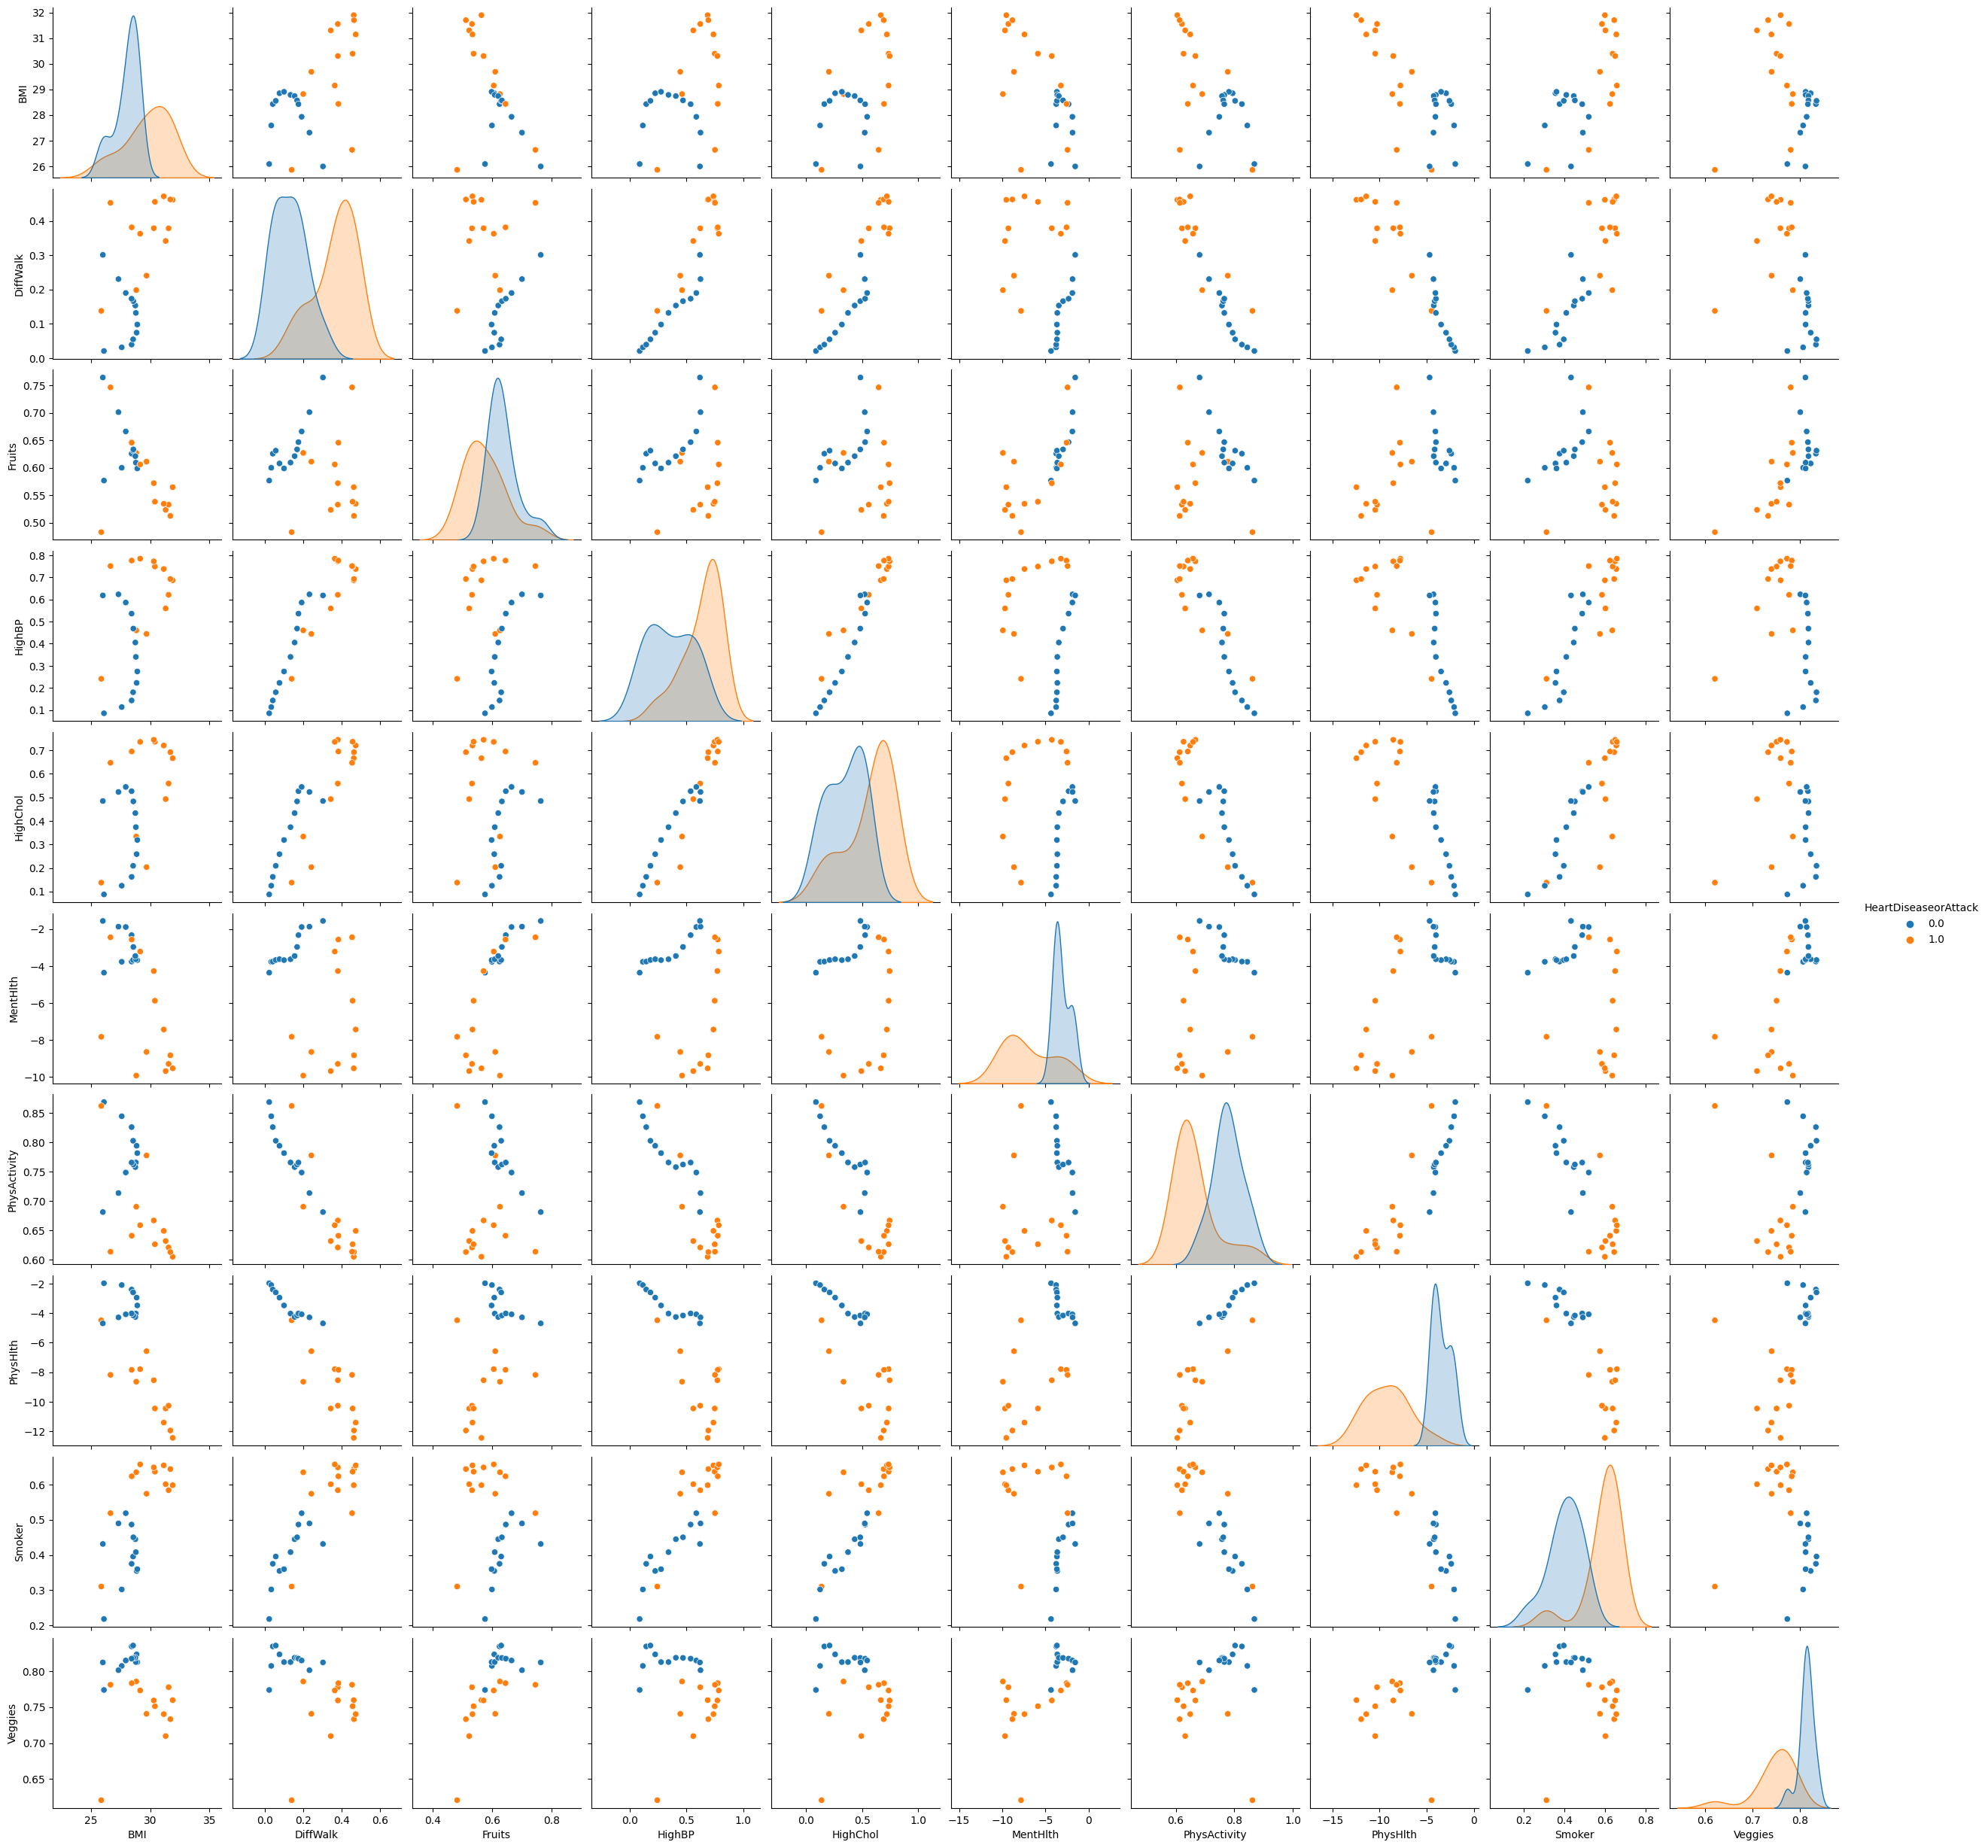

In [ ]:
sns.pairplot(age_new , hue = 'HeartDiseaseorAttack') 

#### Corelation between risk factors and CHD

[Text(0.5, 1.0, 'CHD Correlation Matrix')]

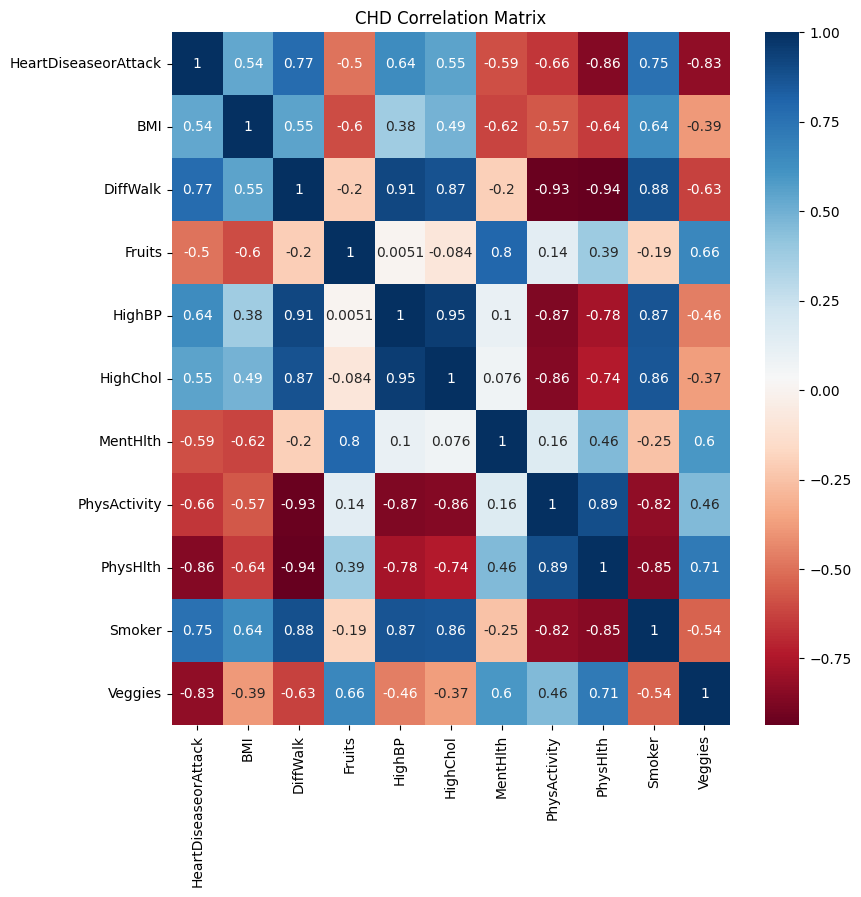

In [ ]:
fig, ax = plt.subplots(figsize=(9,9)) 
correlation = age_new.corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="RdBu", ax=ax).set(title='CHD Correlation Matrix')

[Text(0.5, 1.0, 'Stroke Correlation Matrix')]

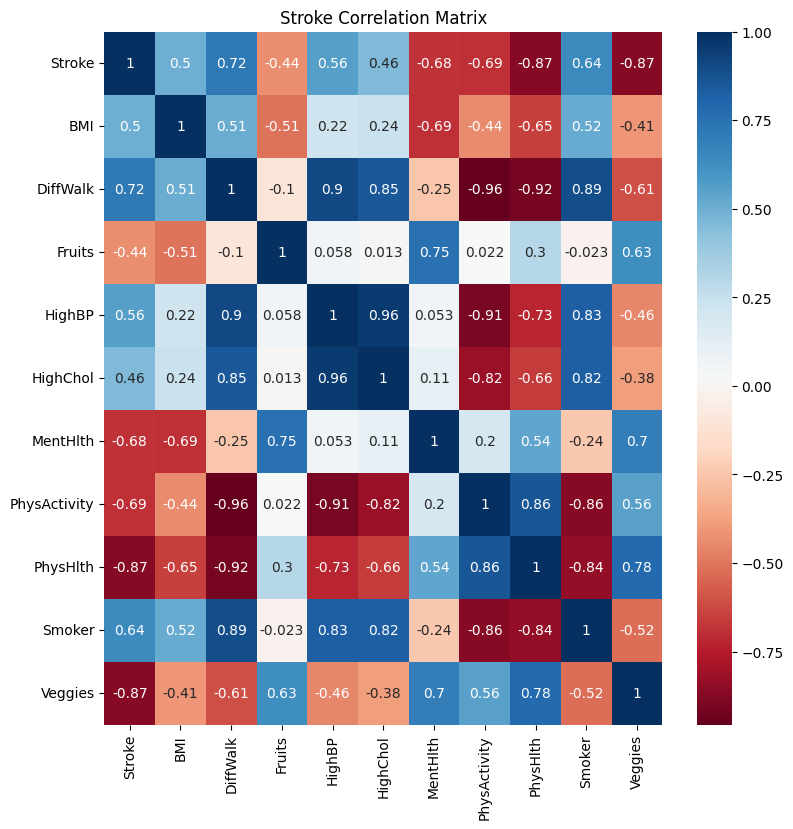

In [ ]:
agest = data[['Age','Stroke','HighBP','HighChol','BMI','Smoker','PhysActivity','Fruits','Veggies','MentHlth','PhysHlth','DiffWalk']]

agest_new = agest.pivot_table(index=['Age','Stroke'], aggfunc = np.mean)
agest_new.reset_index(level='Stroke',inplace=True)
agest_new.fillna(agest_new.mean(),inplace=True)

fig, ax = plt.subplots(figsize=(9,9)) 
correlation = agest_new.corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="RdBu", ax = ax).set(title='Stroke Correlation Matrix')


[Text(0.5, 1.0, 'Diabetes Correlation Matrix')]

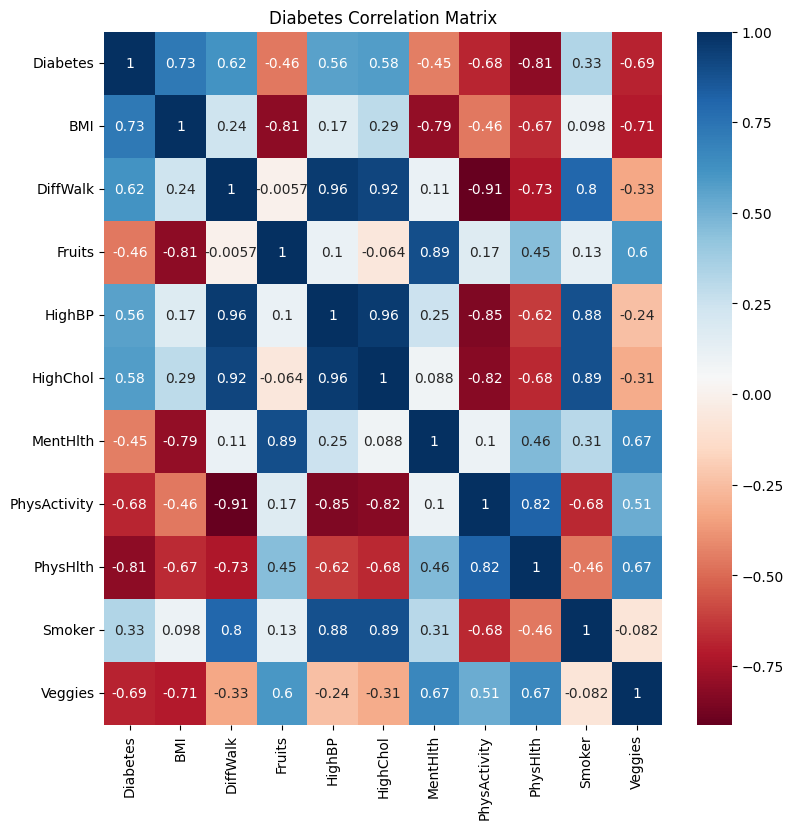

In [ ]:
agedi = data[['Age','Diabetes','HighBP','HighChol','BMI','Smoker','PhysActivity','Fruits','Veggies','MentHlth','PhysHlth','DiffWalk']]

agedi_new = agedi.pivot_table(index=['Age','Diabetes'], aggfunc = np.mean)
agedi_new.reset_index(level='Diabetes',inplace=True)
agedi_new.fillna(agedi_new.mean(),inplace=True)

fig, ax = plt.subplots(figsize=(9,9)) 
correlation = agedi_new.corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="RdBu", ax = ax).set(title='Diabetes Correlation Matrix')

#### Heart Disease/ Attack Prediction Using Machine Learing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier

In [ ]:
X = data.drop('HeartDiseaseorAttack', axis=1)
Y = data['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=48)

In [ ]:
algorithm = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

In [ ]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))


    f1score = f1_score(Y_test, train_predictions, average='weighted')
    print("F1 score: {}".format(f1score))
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

LogisticRegression
****Results****
Accuracy: 90.6457%
Log Loss: 3.3716331398760255
F1 score: 0.8782194259725449
KNeighborsClassifier
****Results****
Accuracy: 89.5676%
Log Loss: 3.760230554016814
F1 score: 0.8701110857075763
RandomForestClassifier
****Results****
Accuracy: 90.1845%
Log Loss: 3.5378704249015183
F1 score: 0.8748206735203918
XGBClassifier
****Results****
Accuracy: 90.6871%
Log Loss: 3.356714409168609
F1 score: 0.8780797806183808
AdaBoostClassifier
****Results****
Accuracy: 90.6851%
Log Loss: 3.3574248249165812
F1 score: 0.8815578991765765
GradientBoostingClassifier
****Results****
Accuracy: 90.7640%
Log Loss: 3.329008194997694
F1 score: 0.8782168549501437
